In [1]:
import os
import imageio
import numpy as np
import matplotlib.animation
import matplotlib.pylab as plt

In [2]:
plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 150  
plt.ioff()

In [3]:
# Make a results folder
epsilon = 1 # bursh size
drama = 20
SAVE = f"../results/2d-{epsilon}/"
if not os.path.exists(SAVE):
  # Create a new directory because it does not exist 
  os.makedirs(SAVE)

In [4]:
# A grid of N x N points
N = 50
x_lim, y_lim = 5, 5 # limits of the grid

nx, ny = (N, N)
x = np.linspace(0, x_lim, nx)
y = np.linspace(0, y_lim, ny)

xv, yv = np.meshgrid(x, y)

In [5]:
pts = np.array([xv.flatten(), yv.flatten()]).T
print(pts.shape)

(2500, 2)


## Common factors

In [6]:
# Action/brush point
x0 = np.array([x_lim/2, y_lim/2])

# scaling
r = pts-x0
print(r.shape)
r_norm = np.linalg.norm(r, ord=2, axis=1)
print(r_norm.shape)
r_epsilon = np.sqrt(np.power(r_norm, 2) + epsilon**2)
r_epsilon = np.stack([r_epsilon, r_epsilon], axis=1)
print(r_epsilon.shape)

# Our action matrices
F_scale = np.identity(2)
F_twist = np.array([[0., -1.], [1., 0.]])
F_pinch = np.array([[0., 1.], [1., 0.]])

scale = 1

(2500, 2)
(2500,)
(2500, 2)


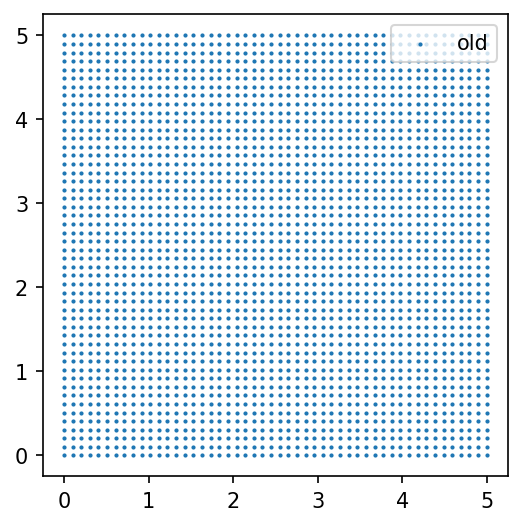

In [7]:
fig = plt.figure(figsize=(4,4))
#plt.scatter(r[:,0], r[:,1], label='r', s=1)
plt.scatter(pts[:,0], pts[:,1], label='old', s=1)
plt.legend()

In [8]:
# material properties
POISSON_RATIO = 10
SHEAR_MODULUS = 0.11
a = 1 / (4 * np.pi * SHEAR_MODULUS)
b = a / (4 * (1 - POISSON_RATIO))
c = 2 / (3 * a - 2 * b)

In [9]:
frames = 20

In [10]:
def animate(t):
    plt.cla()
    plt.plot(x-t,x)
    plt.xlim(0,10)

def animate(data):
    plt.cla()
    plt.scatter(data[:,0], data[:,1], s=1)
    plt.legend()
    plt.axis('off')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## scaling

In [11]:
def scale_deform(pts, amp=-0.02):
    s_disp = np.multiply(2*(b-a)* ((np.power(r_epsilon, -2)) + (epsilon**2)/(np.power(r_epsilon, 4))), (scale*r))
    scale_pts = amp*s_disp + pts
    return scale_pts

In [12]:
# Get a bunch of frames
scale_frames = np.zeros((frames, N*N, 2))
pulsing = np.sin(np.linspace(0, 2*np.pi, frames))/drama
for i in range(frames):
    if i == 0:
        scale_frames[i,...] = scale_deform(pts, amp=pulsing[i])
    else:
        scale_frames[i,...] = scale_deform(scale_frames[i-1,...], amp=pulsing[i])

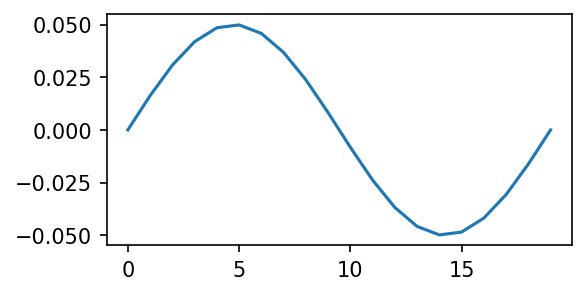

In [13]:
fig = plt.figure(figsize=(4,2))
plt.plot(pulsing)

In [14]:
# Save to gif
filenames = []

for frame in range(frames):

    filename = f'{SAVE}/scale-{frame}.png'
    filenames.append(filename)

    fig, ax = plt.figure(figsize=(6,6)), plt.gca()
    ax.scatter(pts[:,0], pts[:,1], label='old', s=1, alpha=0.2)
    ax.scatter(scale_frames[frame,:,0], scale_frames[frame, :,1], label='scaled', s=1)
    ax.axis('off')
    
    # save frame
    plt.savefig(filename, bbox_inches='tight')
    plt.close()

# build gif
with imageio.get_writer(f"{SAVE}/scale.gif",mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
        
# Remove files
for filename in set(filenames):
    os.remove(filename)

/var/folders/8t/q8xln3jn6xn99tfs9yh85n100000gn/T/ipykernel_77813/2658876620.py:21: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


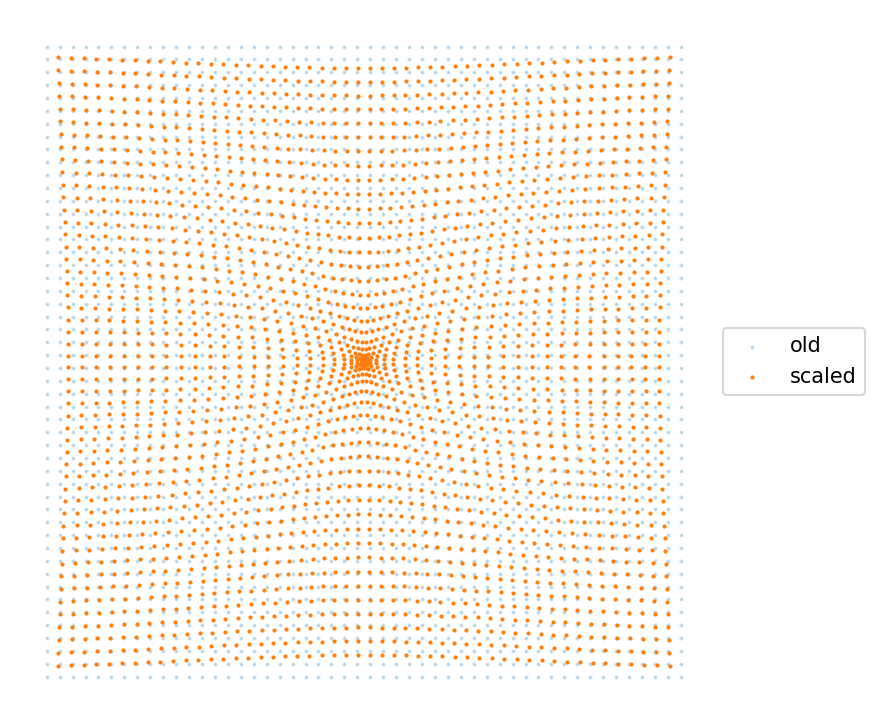

In [15]:
frame = 10

fig, ax = plt.figure(figsize=(6,6)), plt.gca()
ax.scatter(pts[:,0], pts[:,1], label='old', s=1, alpha=0.2)
ax.scatter(scale_frames[frame,:,0], scale_frames[frame, :,1], label='scaled', s=1)
ax.legend()
ax.axis('off')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## Twist

In [16]:
def twist_deform(pts, amp=-0.02):
    t = 1
    t_disp = -2*a*t*np.multiply( ((1/np.power(r_epsilon, 2)) + (epsilon**2/np.power(r_epsilon, 4))), ((F_twist @ r.T).T))
    twist_pts = amp*t_disp + pts
    return twist_pts

In [17]:
# Get a bunch of frames
twist_frames = np.zeros((frames, N*N, 2))
pulsing = np.sin(np.linspace(0, 2*np.pi, frames))/drama
for i in range(frames):
    if i == 0:
        twist_frames[i,...] = twist_deform(pts, amp=pulsing[i])
    else:
        twist_frames[i,...] = twist_deform(twist_frames[i-1,...], amp=pulsing[i])

In [18]:
# Save to gif
filenames = []

for frame in range(frames):

    filename = f'{SAVE}/twist-{frame}.png'
    filenames.append(filename)

    fig, ax = plt.figure(figsize=(6,6)), plt.gca()
    ax.scatter(pts[:,0], pts[:,1], label='old', s=1, alpha=0.2)
    ax.scatter(twist_frames[frame,:,0], twist_frames[frame, :,1], label='twist', s=1)
    ax.axis('off')
    
    # save frame
    plt.savefig(filename, bbox_inches='tight')
    plt.close()

# build gif
with imageio.get_writer(f"{SAVE}/twist.gif",mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
        
# Remove files
for filename in set(filenames):
    os.remove(filename)

/var/folders/8t/q8xln3jn6xn99tfs9yh85n100000gn/T/ipykernel_77813/1655882491.py:21: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


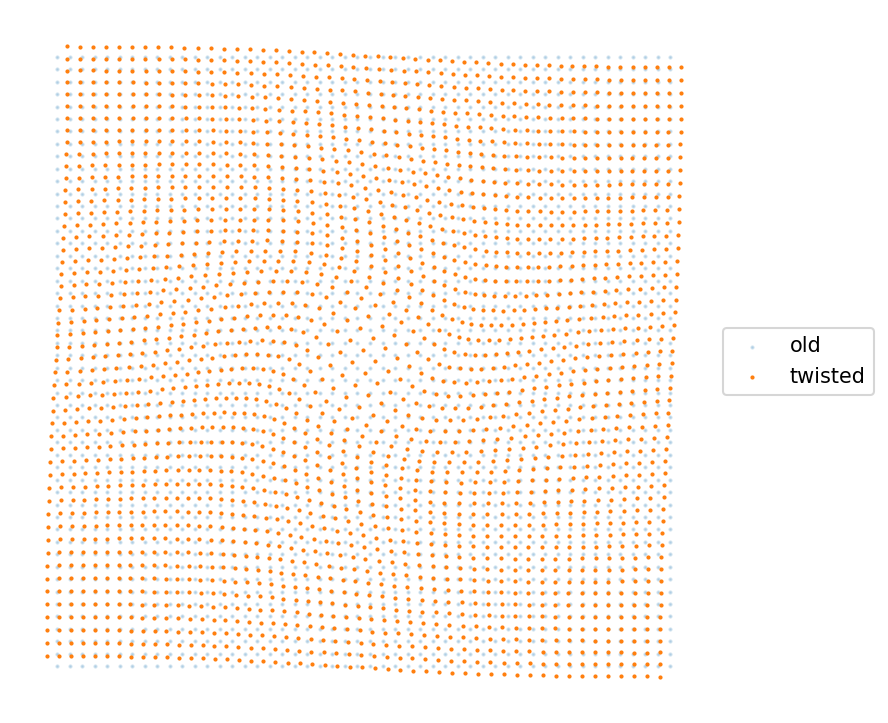

In [19]:
frame = 10

fig, ax = plt.figure(figsize=(6,6)), plt.gca()
ax.scatter(pts[:,0], pts[:,1], label='old', s=1, alpha=0.2)
ax.scatter(twist_frames[frame,:,0], twist_frames[frame, :,1], label='twisted', s=1)
ax.legend()
ax.axis('off')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## pinch

In [20]:
def pinch_deform(pts, amp=-0.02):
    part_a = -2*a*np.multiply(((1/np.power(r_epsilon, 2)) + (np.power(epsilon, 2)/np.power(r_epsilon, 4))),  (F_pinch @ r.T).T)
    part_b = 4*b*np.multiply((F_pinch @r.T).T,  (1/np.power(r_epsilon, 2)) )
    part_c = -4*b*np.multiply( ((((r.T @ (F_pinch @ r.T).T)) @ np.identity(2)) @r.T).T , (1/np.power(r_epsilon, 4)) )

    p_disp = part_a + part_b + part_c
    pinch_pts = 0.0001*p_disp + pts
    return pinch_pts

In [21]:
# Get a bunch of frames
pinch_frames = np.zeros((frames, N*N, 2))
pulsing = np.sin(np.linspace(0, 2*np.pi, frames))/(drama/2)
for i in range(frames):
    if i == 0:
        pinch_frames[i,...] = pinch_deform(pts, amp=pulsing[i])
    else:
        pinch_frames[i,...] = pinch_deform(pinch_frames[i-1,...], amp=pulsing[i])

In [22]:
# Save to gif
filenames = []

for frame in range(frames):

    filename = f'{SAVE}/pinch-{frame}.png'
    filenames.append(filename)

    fig, ax = plt.figure(figsize=(6,6)), plt.gca()
    ax.scatter(pts[:,0], pts[:,1], label='old', s=1, alpha=0.2)
    ax.scatter(pinch_frames[frame,:,0], pinch_frames[frame, :,1], label='pinch', s=1)
    ax.axis('off')
    
    # save frame
    plt.savefig(filename, bbox_inches='tight')
    plt.close()

# build gif
with imageio.get_writer(f"{SAVE}/pinch.gif",mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
        
# Remove files
for filename in set(filenames):
    os.remove(filename)

/var/folders/8t/q8xln3jn6xn99tfs9yh85n100000gn/T/ipykernel_77813/2319551221.py:21: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


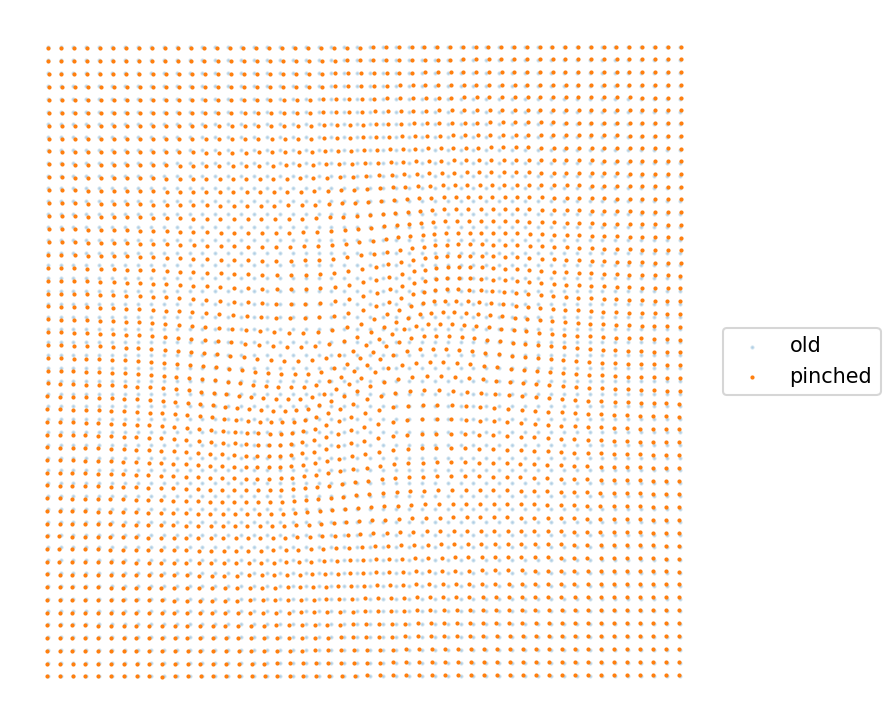

In [23]:
frame = 10

fig, ax = plt.figure(figsize=(6,6)), plt.gca()
ax.scatter(pts[:,0], pts[:,1], label='old', s=1, alpha=0.2)
ax.scatter(pinch_frames[frame,:,0], pinch_frames[frame, :,1], label='pinched', s=1)
ax.legend()
ax.axis('off')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))